In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
df = pd.read_csv('penguins.csv')

In [58]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


### Determining NaN values

In [59]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

### Removing NaN values using boolean indexing

In [61]:
df = df[~pd.isna(df['sex'])]

In [62]:
df = df[df['sex']!='.']

### Clustering data into two xs

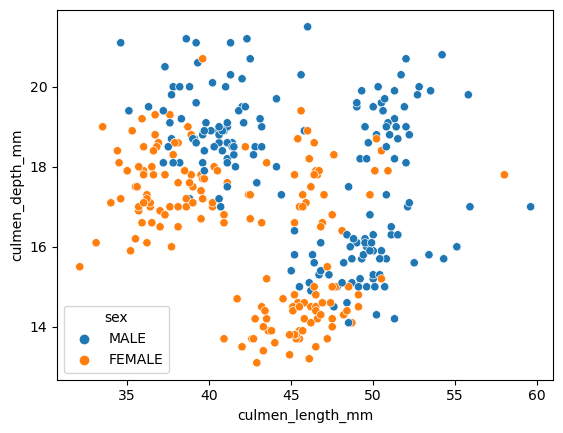

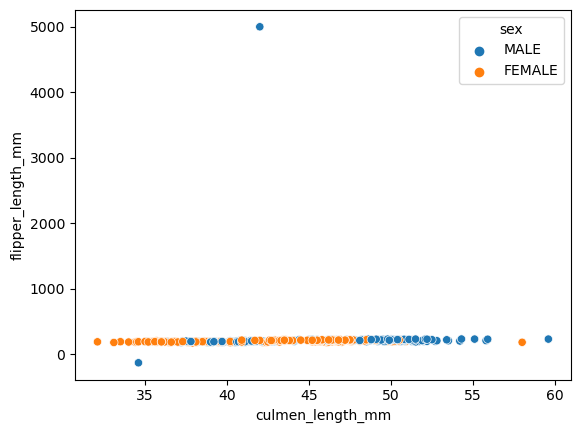

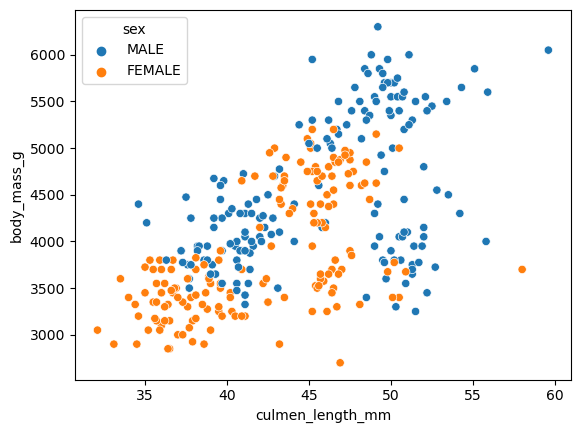

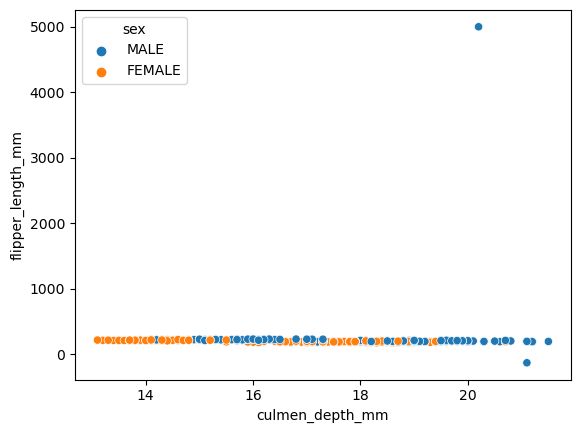

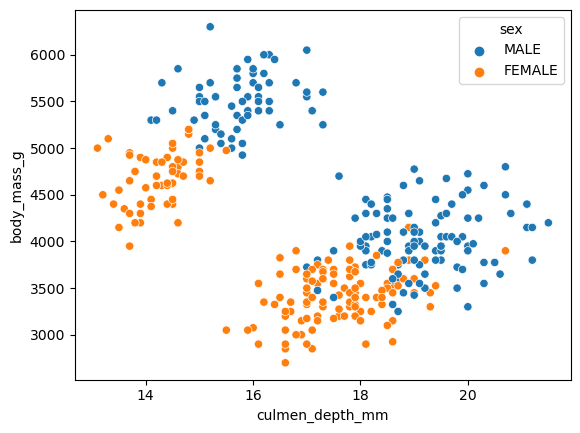

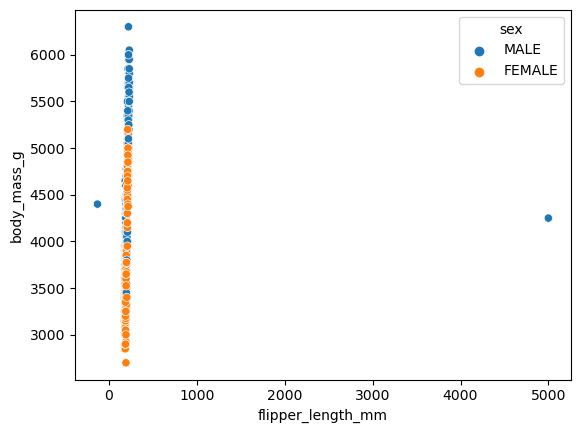

In [63]:
for i in range(len(df.columns)-1):
    for j in range(i+1, len(df.columns)-1): 
        x_label = df.columns[i]
        y_label = df.columns[j]
        sns.scatterplot(x=x_label, y=y_label, data=df, hue='sex')
        plt.show()

In [64]:
# Clustering

In [65]:
from sklearn.cluster import KMeans

In [66]:
x = 'culmen_length_mm'
y= 'culmen_depth_mm'
X = df[[x,y]].values

In [67]:
kmeans =  KMeans(n_clusters=2).fit(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
clusters = kmeans.labels_
cluster_df = pd.DataFrame(np.hstack((X, clusters.reshape(-1,1))), columns=[x,y,'sex'])

[]

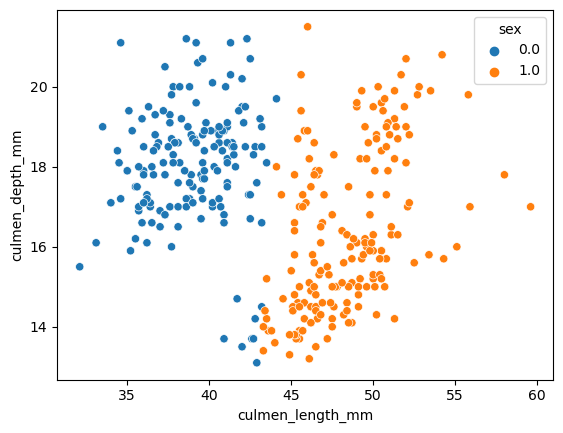

In [69]:
sns.scatterplot(x=x, y=y, hue='sex', data=cluster_df)
plt.plot()

In [77]:
x_1='culmen_depth_mm'
y_1 = 'body_mass_g' 
X_1 = df[[x_1,y_1]].values 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[]

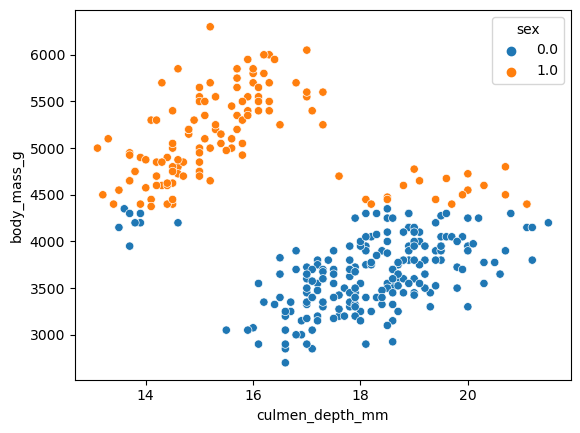

In [78]:
kmeans =  KMeans(n_clusters=2).fit(X_1)
clusters = kmeans.labels_
cluster_df_1 = pd.DataFrame(np.hstack((X_1, clusters.reshape(-1,1))), columns=[x_1,y_1,'sex'])
sns.scatterplot(x=x_1, y=y_1, hue='sex', data=cluster_df_1)
plt.plot()

### The model clustered efficiently based on diffetent input parameters